<a href="https://colab.research.google.com/github/kornia/tutorials/blob/master/source/unsharp_mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sharpen image using unsharp mask

We first install kornia

In [ ]:
%%capture
%matplotlib inline
!pip install kornia

In [ ]:
import kornia

kornia.__version__

'0.6.12-dev'

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch

Downloading the example image.

In [ ]:
import io

import requests


def download_image(url: str, filename: str = "") -> str:
    filename = url.split("/")[-1] if len(filename) == 0 else filename
    # Download
    bytesio = io.BytesIO(requests.get(url).content)
    # Save file
    with open(filename, "wb") as outfile:
        outfile.write(bytesio.getbuffer())

    return filename


url = "https://github.com/kornia/data/raw/main/squirrel.jpg"
download_image(url)

'squirrel.jpg'

In [ ]:
# Read the image with OpenCV
img: np.ndarray = cv2.imread("squirrel.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
# convert image to tensor
data: torch.tensor = kornia.utils.image_to_tensor(img, keepdim=False)
data = data.float() / 255.0

We create Unsharp Mask filter object and apply it to data. The unsharp mask filter is initialized with the format `kornia.filters.UnsharpMask(kernel_size, sigma)`. You can tune these parametres and experiment!

In [ ]:
sharpen = kornia.filters.UnsharpMask((9, 9), (2.5, 2.5))
sharpened_tensor = sharpen(data)
difference = (sharpened_tensor - data).abs()

In [ ]:
# Converting the sharpened tensor to image
sharpened_image = kornia.utils.tensor_to_image(sharpened_tensor)
difference_image = kornia.utils.tensor_to_image(difference)

So, let us understand how we arrived till here.

1. In the unsharp mask technique, first a gaussian blur is applied to the data.
2. Then the blur is subtracted from the orignal data.
3. The resultant is added to the origanl data.
4. So, what do we get? Sharpened data!

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


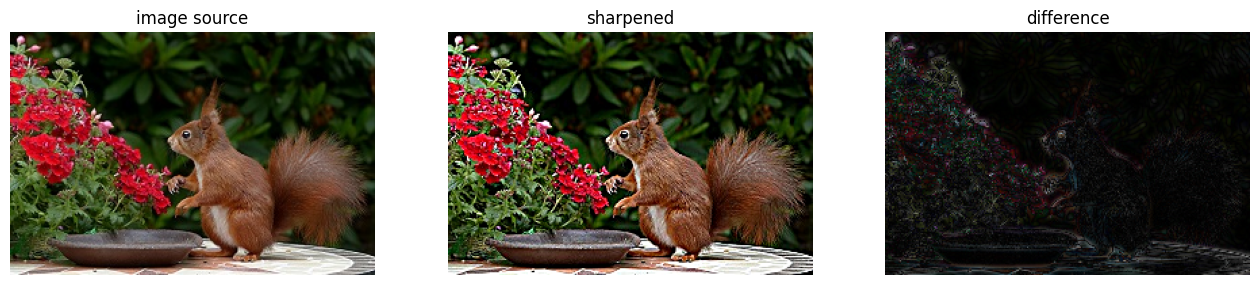

In [ ]:
# To display the input image, sharpened image and the difference image
fig, axs = plt.subplots(1, 3, figsize=(16, 10))
axs = axs.ravel()

axs[0].axis("off")
axs[0].set_title("image source")
axs[0].imshow(img)

axs[1].axis("off")
axs[1].set_title("sharpened")
axs[1].imshow(sharpened_image)

axs[2].axis("off")
axs[2].set_title("difference")
axs[2].imshow(difference_image)
plt.show()